In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [235]:
#SelectKBest -

#Feature - Cat, Target - Cat ==> Chi-Square

#Feature - Numeric, Target - Numeric ==> Correlation

#Feature - Cat, Target - Numeric ==> f_regression

#Feature - Numeric, Target - Cat ==> f_classification

In [236]:
np.random.seed(42)

In [237]:
#function that return accuracy f1score and confusion_matrix
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [238]:
df = pd.read_csv('diabetes.csv')

In [239]:
df.shape

(768, 9)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [241]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [242]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [243]:
#creating new features
df['BloodPressureSquare'] = np.square(df['BloodPressure'])
df['BloodPressureCube'] = df['BloodPressure']**3
df['BloodPressureSqrt'] = np.sqrt(df['BloodPressure'])

In [244]:
df['GlucoseSquare'] = np.square(df['Glucose'])
df['GlucoseCube'] = df['Glucose']**3
df['GlucoseSqrt'] = np.sqrt(df['Glucose'])

In [245]:
df['GlucoseBloodPressure'] = df['BloodPressure'] * df['Glucose']
df['AgeBMI'] = df['Age'] * df['BMI']

In [246]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseBloodPressure,AgeBMI
0,6,148,72,35,0,33.6,0.627,50,1,5184,373248,8.485281,21904,3241792,12.165525,10656,1680.0
1,1,85,66,29,0,26.6,0.351,31,0,4356,287496,8.124038,7225,614125,9.219544,5610,824.6
2,8,183,64,0,0,23.3,0.672,32,1,4096,262144,8.000000,33489,6128487,13.527749,11712,745.6
3,1,89,66,23,94,28.1,0.167,21,0,4356,287496,8.124038,7921,704969,9.433981,5874,590.1
4,0,137,40,35,168,43.1,2.288,33,1,1600,64000,6.324555,18769,2571353,11.704700,5480,1422.3


In [247]:
#for seeing which features are categorical
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

[]

In [248]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'BloodPressureSquare',
 'BloodPressureCube',
 'BloodPressureSqrt',
 'GlucoseSquare',
 'GlucoseCube',
 'GlucoseSqrt',
 'GlucoseBloodPressure',
 'AgeBMI']

In [249]:
target = 'Outcome'

<Axes: >

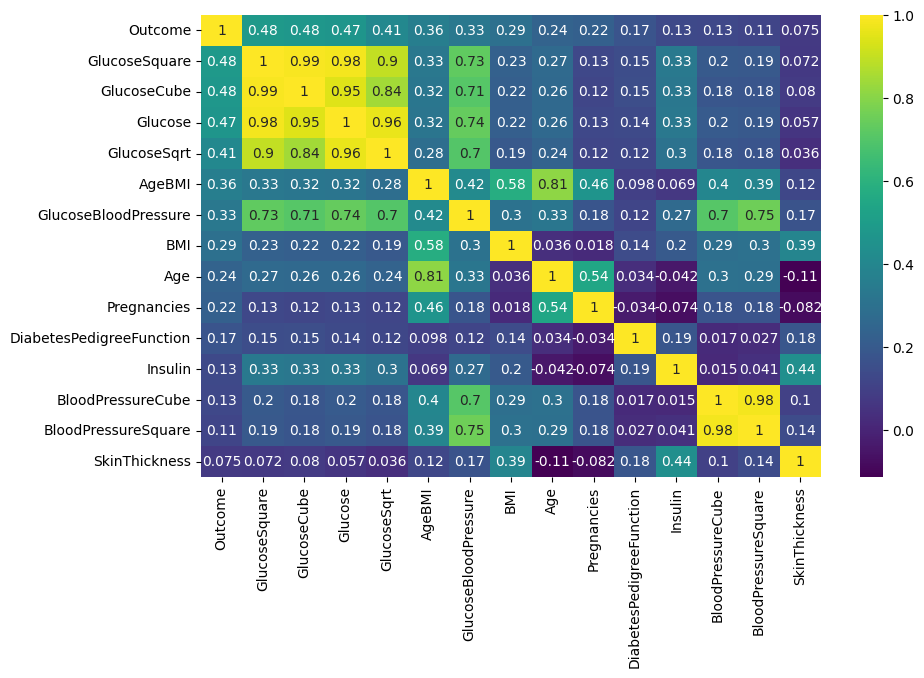

In [250]:
k = 15 #number of variables for heatmap
#here we are finding out the 15 columns that has highest correlation with
#target and then finding correation of every col out 15 to one another
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

#df[numerical_feature_columns].corr().nlargest(15,target)
#nlargest sort the dataframe based on values in target=outcome in
#descending order
#df[numerical_feature_columns].corr().nlargest(k, target)[target]
#it will give correlation of all cols with outcome in descending order
#then take out the index
#df[numerical_feature_columns].corr().nlargest(k, target)[target].index
#and then calculate correlation on these columns

In [251]:
X = df.loc[:, df.columns != target]
y = df.loc[:, df.columns == target]

In [252]:
X.shape

(768, 16)

In [253]:
y.shape

(768, 1)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [255]:
clf_lr = LogisticRegression()
lr_baseline_model = clf_lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [256]:
generate_accuracy_and_heatmap(lr_baseline_model, X_test, y_test)

Accuracy is:  0.7362204724409449
F1 score is:  0.5786163522012578


Actual      0   1
Predicted        
0          39  22
1          16  11


1

In [257]:
#Univariate feature selection

In [258]:
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
#it will select 5 best feature based in chi square test

In [259]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
12,GlucoseCube,1.761445e+08
9,BloodPressureCube,1.593130e+06
11,GlucoseSquare,5.648368e+05
14,GlucoseBloodPressure,1.103187e+05
15,AgeBMI,1.631053e+04
8,BloodPressureSquare,9.645350e+03
4,Insulin,1.710652e+03
1,Glucose,1.033139e+03
7,Age,1.691104e+02
5,BMI,9.835662e+01


In [260]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

In [261]:
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BloodPressureSquare,BloodPressureCube,BloodPressureSqrt,GlucoseSquare,GlucoseCube,GlucoseSqrt,GlucoseBloodPressure,AgeBMI
464,10,115,98,0,0,24.0,1.022,34,9604,941192,9.899495,13225,1520875,10.723805,11270,816.0
223,7,142,60,33,190,28.8,0.687,61,3600,216000,7.745967,20164,2863288,11.916375,8520,1756.8
393,4,116,72,12,87,22.1,0.463,37,5184,373248,8.485281,13456,1560896,10.770330,8352,817.7


In [262]:
X_train_chi[0:3]

array([[9.411920e+05, 1.322500e+04, 1.520875e+06, 1.127000e+04,
        8.160000e+02],
       [2.160000e+05, 2.016400e+04, 2.863288e+06, 8.520000e+03,
        1.756800e+03],
       [3.732480e+05, 1.345600e+04, 1.560896e+06, 8.352000e+03,
        8.177000e+02]])

In [263]:
lr_chi_model = clf_lr.fit(X_train_chi,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [264]:
generate_accuracy_and_heatmap(lr_chi_model, X_test_chi, y_test)

Accuracy is:  0.7322834645669292
F1 score is:  0.5405405405405406


Actual      0   1
Predicted        
0          41  25
1          14   8


1

In [265]:
#recursive feature elimination
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [266]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')
#jitni kam ranking utna important feature

,Feature,Ranking
0,Pregnancies,1
1,Glucose,1
2,BloodPressure,1
5,BMI,1
7,Age,1
10,BloodPressureSqrt,1
13,GlucoseSqrt,1
15,AgeBMI,1
14,GlucoseBloodPressure,2
4,Insulin,3


In [267]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [268]:
X_train_rfe[0:3]

array([[  10.        ,  115.        ,   98.        ,   24.        ,
          34.        ,    9.89949494,   10.72380529,  816.        ],
       [   7.        ,  142.        ,   60.        ,   28.8       ,
          61.        ,    7.74596669,   11.91637529, 1756.8       ],
       [   4.        ,  116.        ,   72.        ,   22.1       ,
          37.        ,    8.48528137,   10.77032961,  817.7       ]])

In [269]:
lr_rfe_model = clf_lr.fit(X_train_rfe, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [270]:
generate_accuracy_and_heatmap(lr_rfe_model, X_test_rfe, y_test)

Accuracy is:  0.7480314960629921
F1 score is:  0.6144578313253013


Actual      0   1
Predicted        
0          36  22
1          19  11


1

In [271]:
#Recursive feature elimination with cross validation

In [272]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [273]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age',
       'BloodPressureSqrt', 'GlucoseSqrt'],
      dtype='object')


In [274]:
rfecv.cv_results_['split4_test_score']

array([0.74509804, 0.73529412, 0.75490196, 0.75490196, 0.76470588,
       0.75490196, 0.78431373, 0.7745098 , 0.7745098 , 0.76470588,
       0.7745098 , 0.75490196, 0.75490196, 0.75490196, 0.75490196,
       0.75490196])

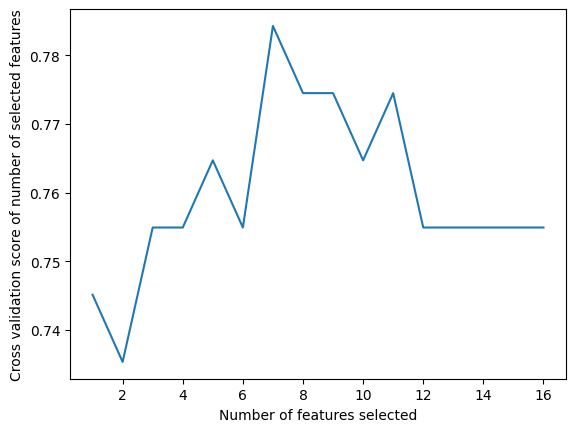

In [275]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['split4_test_score']) + 1), rfecv.cv_results_['split4_test_score'])
plt.show()

In [276]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [277]:
lr_rfecv_model = clf_lr.fit(X_train_rfecv, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:
generate_accuracy_and_heatmap(lr_rfecv_model, X_test_rfecv, y_test)

Accuracy is:  0.7480314960629921
F1 score is:  0.6190476190476191


Actual      0   1
Predicted        
0          36  22
1          19  11


1

In [279]:
#for more understanding
#https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2